# Experiment - 3 : Polynomial Regression
Name: Shantanu Shaji

PRN: 24070126165

---
Title: Implementation of Polynomial Regression

Aim: To apply Polynomial Regression on a given dataset.

---


Problem statement:
-
- Use the given dataset to perform Polynomial Regression.
- Study the non-linear relationship between independent and dependent variables.

Objective:
-
- To understand the basics of Polynomial Regression.
- To build and analyze a Polynomial Regression model.
---



## Definition
Polynomial Regression models a **non-linear** relationship between the independent and dependent variables by fitting a *polynomial equation*.



---
## Setup
Required libraries such as NumPy, Pandas, Matplotlib, and Scikit-learn are imported, and the dataset is loaded for analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Semesters/SEM_4/SML/Lab/Datasets/pr_ds.csv')
data

,index,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0011
2,3,40,0.0055
3,4,60,0.0100
4,5,80,0.0900
5,6,100,0.2200


Statistical Information about the dataset

In [ ]:
data.describe()

,index,Temperature,Pressure
count,6.000000,6.000000,6.000000
mean,3.500000,50.000000,0.054467
std,1.870829,37.416574,0.088127
min,1.000000,0.000000,0.000200
25%,2.250000,25.000000,0.002200
50%,3.500000,50.000000,0.007750
75%,4.750000,75.000000,0.070000
max,6.000000,100.000000,0.220000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


##### Assigning the values to the variables


In [ ]:
x = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
display(x, y)

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

array([2.0e-04, 1.1e-03, 5.5e-03, 1.0e-02, 9.0e-02, 2.2e-01])

---
## Model
The polynomial regression model is given by:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \dots + \beta_n x^n
$$

> $y$ : dependent variable  
> $x$ : independent variable  
> $\beta_0$ : intercept  
> $\beta_1, \beta_2, \dots, \beta_n$ : model coefficients  
> $n$ : degree of the polynomial

Polynomial Regression captures complex non-linear relationships by increasing the degree of the model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Building Linear Regression of data for reference:

In [ ]:
model_lin = LinearRegression()
model_lin.fit(x, y)

LinearRegression()

#### Fitting the Features into polynomial scale

In [ ]:
poly = PolynomialFeatures(degree=3) #set polynomial object with degree 3

x_poly = poly.fit_transform(x) #scale the dataset to polynomial degree

poly.fit(x_poly, y)

PolynomialFeatures(degree=3)

#### Polynomial regression

In [ ]:
model_poly = LinearRegression()
model_poly.fit(x_poly, y) #fit the model

LinearRegression()


---
## Visuals
Comparing the results of Polynomial Regression against Linear Regression

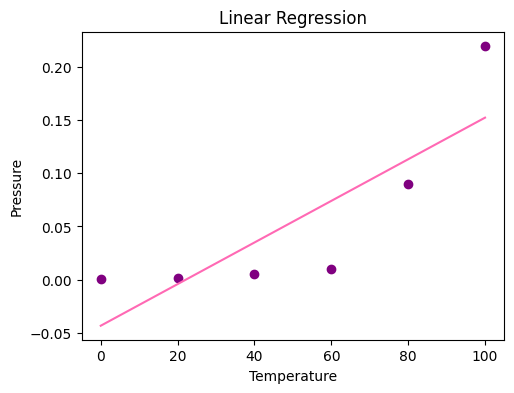

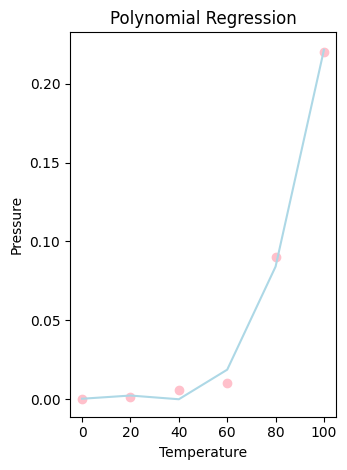

In [ ]:
plt.figure(figsize=(12, 4))

# LR results
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.scatter(x, y, color = 'purple')
plt.plot(x, model_lin.predict(x), color = 'hotpink')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

# PR results
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.scatter(x, y, color = 'pink')
plt.plot(x, model_poly.predict(poly.fit_transform(x)), color='lightblue')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')


plt.tight_layout()
plt.show()

---
## Applications

Polynomial Regression is used when data shows a clear non-linear trend that cannot be captured by linear models.

> Economics : model cost, revenue, profit curves  
> Engineering : model stress–strain relationships, system behaviors  
> Healthcare : analyze growth patterns, dosage-response curves, disease progression  
> Environment : model temperature trends, pollution levels, climate patterns  
> Business Analytics : forecast demand, sales trends, market analysis

# Activity 2

Working on data generated with np.random

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(69)

# Generate input data
x = 14 - 6 * np.random.normal(0, 1, 20)

# Generate output data using a cubic relationship + noise
y = (
    x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3, 3, 20)  # np random for noise
)

display(pd.DataFrame({"x":x, "y":y}).head())

,x,y
0,8.506957,171.391151
1,17.621252,2125.868708
2,7.026229,80.944321
3,17.608401,2120.953597
4,23.584914,5461.675366


Cubic Relation

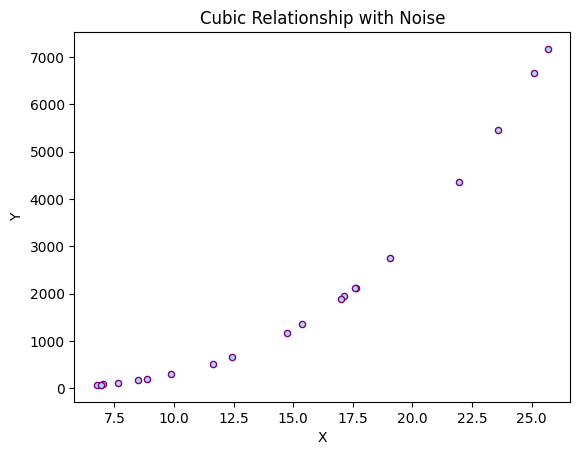

In [ ]:
# Scatter plot
plt.scatter(x, y, s=20, color = "lightblue", edgecolors = "purple")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Cubic Relationship with Noise")
plt.show()

In [ ]:
# reshape x to 2D
x = x.reshape(-1, 1)  # converts shape from (n_samples,) to (n_samples, 1)

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x, y)

y_pred = LR.predict(x)

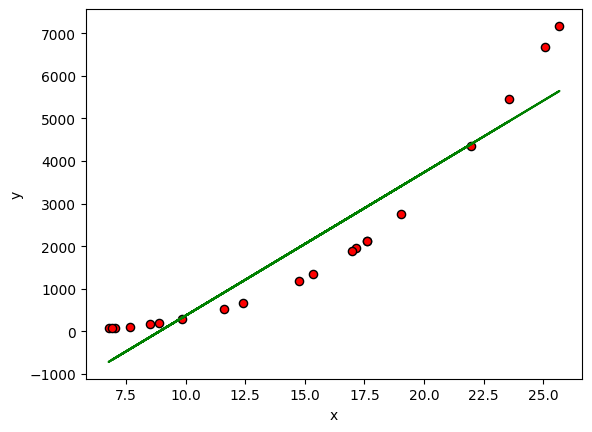

In [ ]:
# Displaying the predictions
plt.scatter(x, y, s=35, color='red', edgecolors='black')
plt.plot(x, y_pred, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Testing several curves together

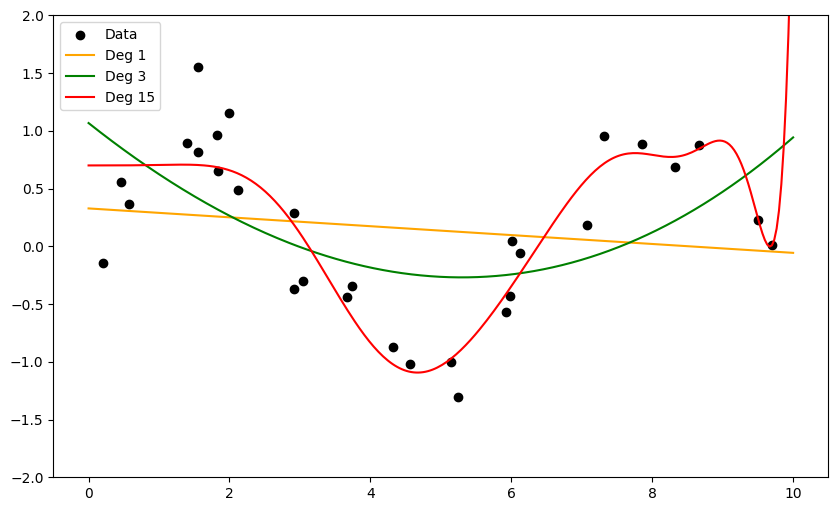

In [ ]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data generation
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, 30)
X_seq = np.linspace(0, 10, 300)[:, np.newaxis]

# Model and Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='black', label="Data")
for d, c in zip([1, 3, 15], ['orange', 'green', 'red']):
    m = make_pipeline(PolynomialFeatures(d), LinearRegression()).fit(X, y)
    plt.plot(X_seq, m.predict(X_seq), c=c, label=f"Deg {d}")

plt.ylim(-2, 2); plt.legend(); plt.show()